<a href="https://colab.research.google.com/github/sungrae98/KaggleDataset/blob/main/Korean_Baseball_pitching_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Korean Baseball pitching Analysis
- 한국 프로야구 투수 데이터(1982~2021년)/linear regression model

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.formula.api import ols

In [ ]:
pitchingData = pd.read_csv('/content/drive/MyDrive/BaseballData/kbopitchingdata.csv')

### Data Preparation

In [ ]:
# null 값 존재 확인, 각 변수의 데이터 타입 확인
pitchingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   323 non-null    int64  
 1   year                 323 non-null    int64  
 2   team                 323 non-null    object 
 3   average_age          323 non-null    float64
 4   runs_per_game        323 non-null    float64
 5   wins                 323 non-null    int64  
 6   losses               323 non-null    int64  
 7   win_loss_percentage  323 non-null    float64
 8   ERA                  323 non-null    float64
 9   run_average_9        323 non-null    float64
 10  games                323 non-null    int64  
 11  games_started        184 non-null    float64
 12  games_finished       184 non-null    float64
 13  complete_game        323 non-null    int64  
 14  shutouts             323 non-null    int64  
 15  saves                323 non-null    int

In [ ]:
pitchingData.head()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,games,games_started,games_finished,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,intentional_walks,strikeouts,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,143,143.0,143.0,0,18,32,1264.1,1117,557,501,79,542,17.0,1062,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,143,143.0,141.0,2,6,33,1255.0,1166,581,512,85,486,18.0,1051,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,143,143.0,141.0,2,10,27,1260.1,1288,653,599,104,586,16.0,1037,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,143,143.0,141.0,2,14,46,1250.0,1287,653,596,129,526,13.0,1031,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,143,143.0,140.0,3,10,33,1247.2,1256,686,624,122,585,14.0,1046,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79


In [ ]:
# 두산 베어스
pitchingData[pitchingData['team'] == 'Doosan Bears']

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,games,games_started,games_finished,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,intentional_walks,strikeouts,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,143,143.0,141.0,2,10,27,1260.1,1288,653,599,104,586,16.0,1037,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
12,13,2020,Doosan Bears,26.7,4.83,79,61,0.564,4.31,4.87,144,144.0,143.0,1,13,23,1285.2,1395,695,616,109,478,22.0,1046,61,4.0,52.0,5681,1.457,9.8,0.8,3.3,7.3,2.19
21,22,2019,Doosan Bears,28.8,3.82,88,55,0.615,3.51,3.86,144,144.0,141.0,3,10,44,1283.2,1259,550,500,78,380,22.0,860,70,5.0,48.0,5434,1.277,8.8,0.5,2.7,6.0,2.26
31,32,2018,Doosan Bears,27.7,5.25,93,51,0.646,4.98,5.28,144,144.0,143.0,1,9,41,1288.2,1401,756,713,154,476,17.0,1025,109,2.0,72.0,5700,1.457,9.8,1.1,3.3,7.2,2.15
41,42,2017,Doosan Bears,29.4,4.71,84,57,0.596,4.38,4.74,144,144.0,141.0,3,9,35,1288.0,1405,678,627,125,464,11.0,956,87,4.0,54.0,5682,1.451,9.8,0.9,3.2,6.7,2.06
50,51,2016,Doosan Bears,29.1,4.74,93,50,0.650,4.45,4.77,144,144.0,142.0,2,7,36,1287.2,1385,682,636,136,498,7.0,982,77,4.0,66.0,5658,1.462,9.7,1.0,3.5,6.9,1.97
65,66,2015,Doosan Bears,27.9,5.39,79,65,0.549,5.02,5.43,144,144.0,141.0,3,10,30,1286.0,1385,776,718,138,584,15.0,1064,77,11.0,72.0,5762,1.531,9.7,1.0,4.1,7.4,1.82
75,76,2014,Doosan Bears,28.2,5.73,59,68,0.465,5.43,5.87,128,128.0,124.0,4,2,19,1123.2,1311,733,678,121,450,4.0,840,58,4.0,56.0,5066,1.567,10.5,1.0,3.6,6.7,1.87
85,86,2013,Doosan Bears,28.5,4.88,71,54,0.568,4.57,4.89,128,128.0,127.0,1,8,30,1150.1,1183,625,584,84,514,10.0,848,76,6.0,55.0,5043,1.475,9.3,0.7,4.0,6.6,1.65
90,91,2012,Doosan Bears,28.3,3.90,68,62,0.523,3.58,3.91,133,133.0,124.0,9,12,38,1193.1,1053,519,475,66,491,17.0,802,57,4.0,57.0,5012,1.294,7.9,0.5,3.7,6.0,1.63


In [ ]:
pitchingData[pitchingData['team'] == 'KT Wiz']

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,games,games_started,games_finished,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,intentional_walks,strikeouts,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,143,143.0,141.0,2,6,33,1255.0,1166,581,512,85,486,18.0,1051,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
14,15,2020,KT Wiz,27.5,4.97,81,62,0.566,4.54,4.99,144,144.0,144.0,0,5,33,1290.1,1357,715,651,118,523,20.0,848,59,1.0,75.0,5680,1.457,9.5,0.8,3.6,5.9,1.62
25,26,2019,KT Wiz,25.5,4.59,71,71,0.500,4.29,4.66,144,144.0,142.0,2,10,37,1277.0,1303,661,608,118,481,17.0,848,61,6.0,50.0,5533,1.397,9.2,0.8,3.4,6.0,1.76
37,38,2018,KT Wiz,27.9,5.79,59,82,0.418,5.34,5.89,144,144.0,140.0,4,5,24,1274.1,1580,834,756,194,409,25.0,1025,84,1.0,63.0,5743,1.561,11.2,1.4,2.9,7.2,2.51
48,49,2017,KT Wiz,25.5,6.08,50,94,0.347,5.75,6.28,144,144.0,140.0,4,7,22,1256.0,1524,876,803,174,433,11.0,913,95,6.0,77.0,5702,1.558,10.9,1.2,3.1,6.5,2.11
59,60,2016,KT Wiz,25.4,6.44,53,89,0.373,5.92,6.55,144,144.0,143.0,1,2,27,1273.0,1593,927,838,145,560,9.0,980,84,9.0,77.0,5896,1.691,11.3,1.0,4.0,6.9,1.75
69,70,2015,KT Wiz,25.9,6.08,52,91,0.364,5.56,6.22,144,144.0,141.0,3,3,16,1266.2,1518,875,782,154,577,17.0,1046,87,4.0,86.0,5799,1.654,10.8,1.1,4.1,7.4,1.81


In [ ]:
pitchingData = pitchingData[['wins','walks','ERA','hits','earned_runs','strikeouts','win_loss_percentage','runs_per_game','hits_9','WHIP']]

### Check for Linearity

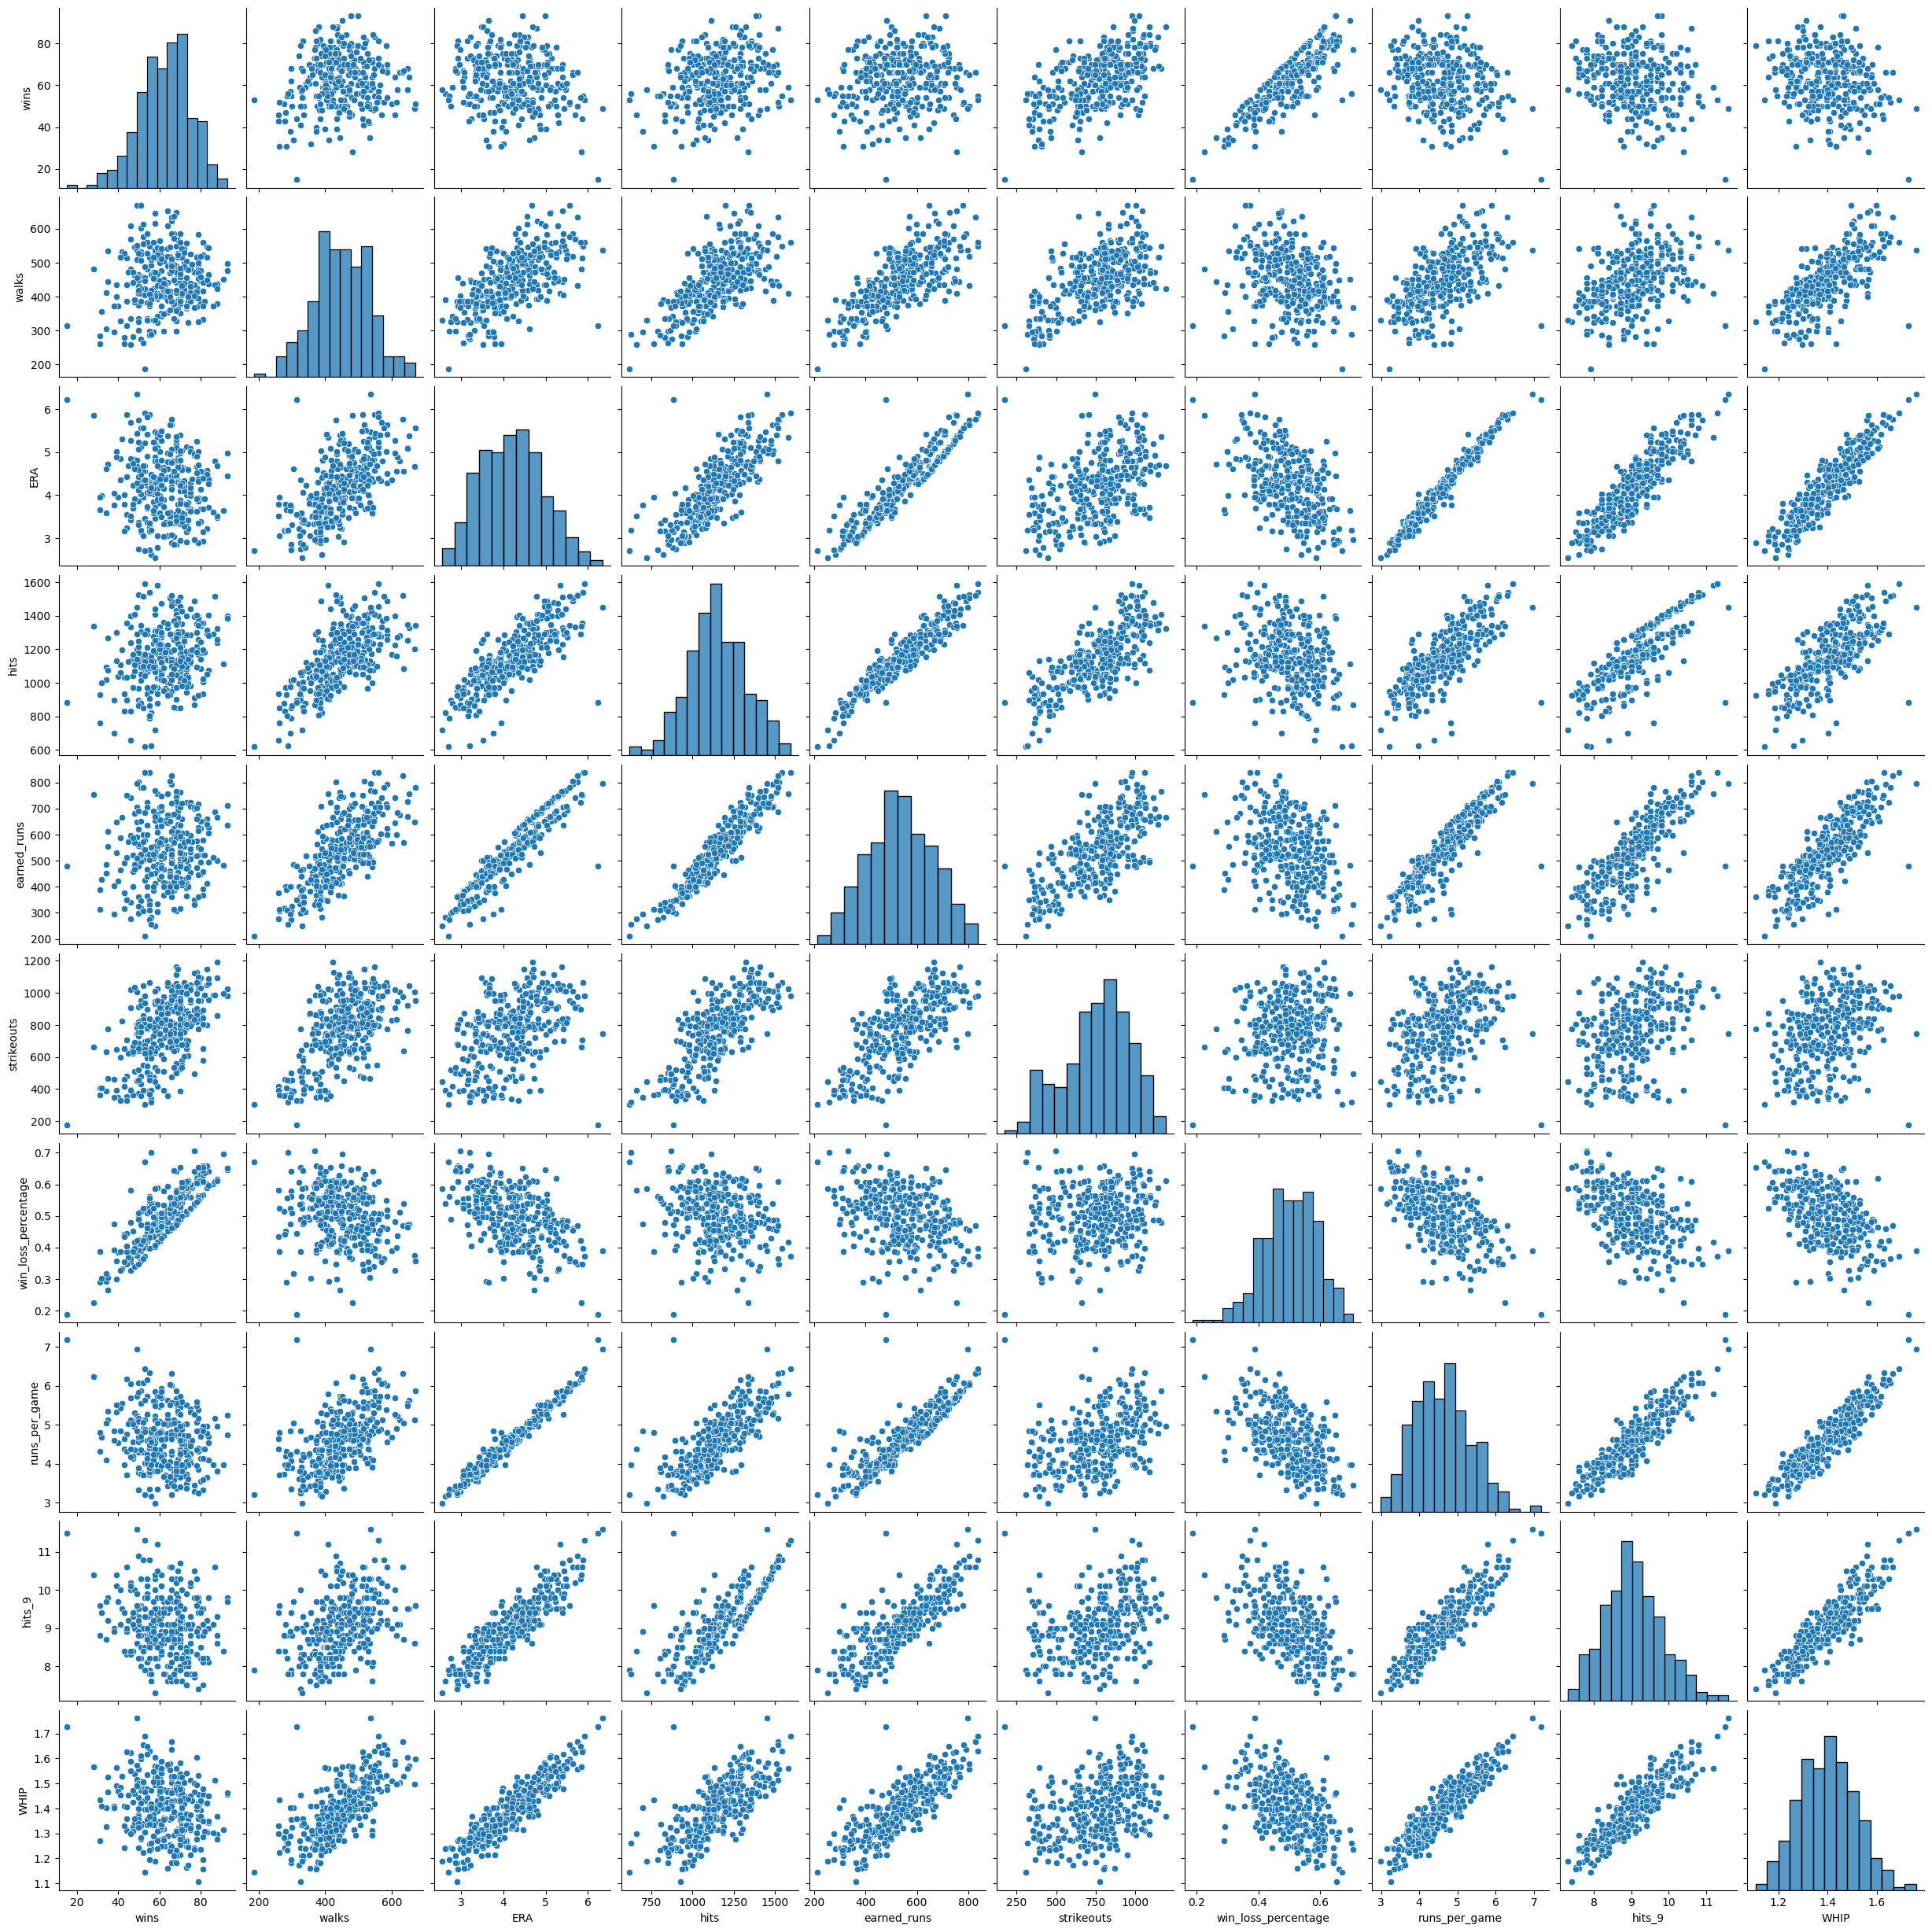

In [ ]:
sns.pairplot(pitchingData)

독립변수 WHIP로 하고
경기당 실점을 예측하는 모델

### Build the Model

In [ ]:
olsData = pitchingData[['runs_per_game','WHIP']]

In [ ]:
olsFormula = 'runs_per_game ~ WHIP'

In [ ]:
OLS = ols(formula = olsFormula, data = olsData)
model = OLS.fit()

<Axes: xlabel='WHIP', ylabel='runs_per_game'>

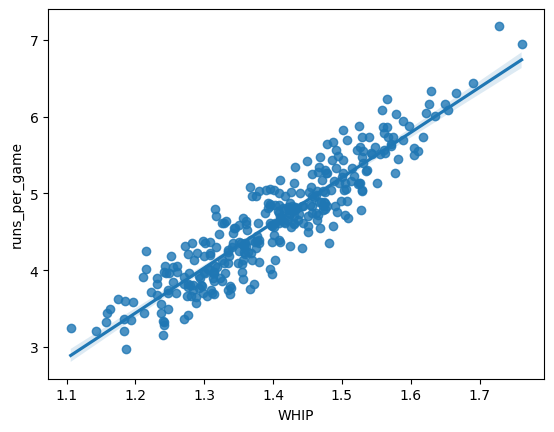

In [ ]:
sns.regplot(data = olsData, x = 'WHIP', y = 'runs_per_game')

### Check Model Assumptions




#### check for Normality

In [ ]:
# 잔차
fitted_values = model.predict(olsData['WHIP'])
residuals = model.resid

In [ ]:
residuals = model.resid

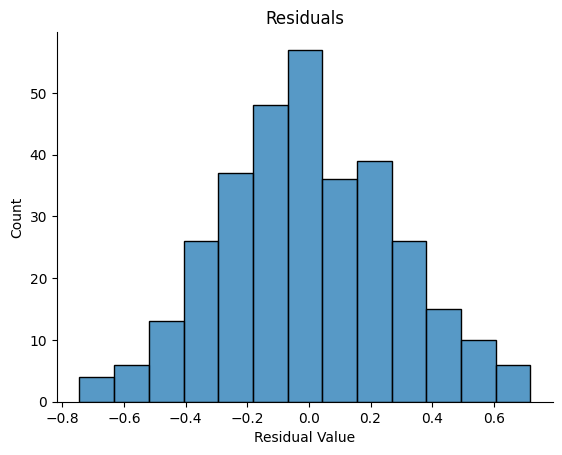

In [ ]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Residuals")
sns.despine()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

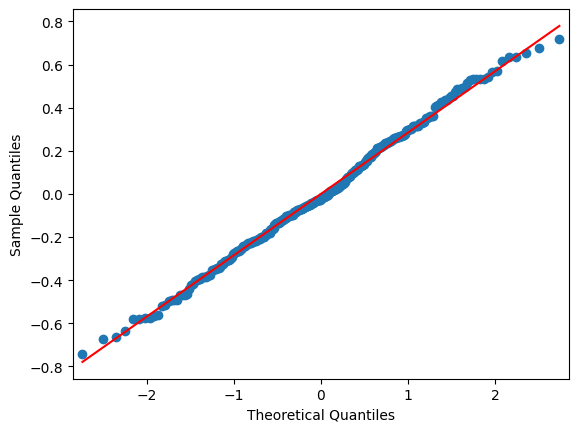

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(residuals, line = 's')
sns.despine

#### Check for Homoscedasticity

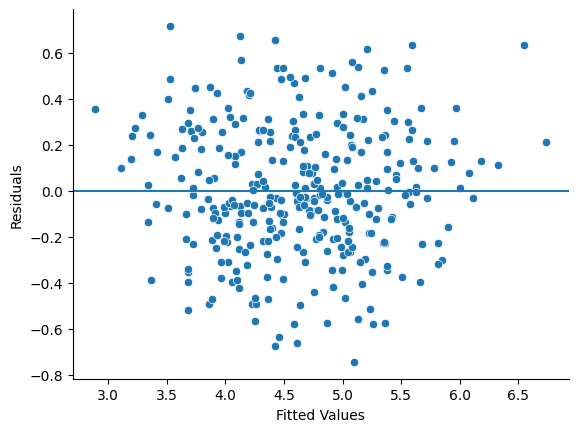

In [ ]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
sns.despine()

## Model Evaluation

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          runs_per_game   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1811.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          5.20e-134
Time:                        13:14:03   Log-Likelihood:                -52.268
No. Observations:                 323   AIC:                             108.5
Df Residuals:                     321   BIC:                             116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6058      0.194    -18.586      0.000      -3.987      -3.224
WHIP           5.8744      0.138     42.553      0.000       5.603       6.146
==============================================================================
Omnibus:                        1.752   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.586
Skew:                           0.057   Prob(JB):                        0.452
Kurtosis:                       2.677   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결정계수(R-Squared) 회귀 모뎅에서 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표.


결정계수가 높을수록 독립변수가 종속변수를 많이 설명한다는 뜻.
(독립변수의 수가 증가하면 상승함. 따라서 Adj. R-squared 값도 필요함.)

## Model Interpretation

Formula: Runs Per Game = -3.6058 + 5.8744 x WHIP

In [ ]:
intercept = -3.6058
slope = 5.8744

A team's pitcher has a contract that is expiring soon.(계약이 곧 만료됨)
He has a WHIP of 1.5, and the team wants to predict how many runs per game the pitcher is likely to give up.(WHIP = 1.5인 이 투수가 경기당 몇 점을 내줄 가능성이 있는지 예측)

In [ ]:
whip = 1.5

In [ ]:
runsPerGame = (whip*slope) + intercept

In [ ]:
print(f"The pitcher is predicted to give up {round(runsPerGame,1)} runs per game.")

The pitcher is predicted to give up 5.2 runs per game.


Suppose the team wants to keep the opposing teams runs per game to 3 or below.(팀이 경기당 상대팀의 실점을 3점 이하로 유지한다고 가정)

In [ ]:
runsPerGame = 3

In [ ]:
whip = (runsPerGame - intercept) / slope

In [ ]:
print(f"If the team wants to keep the opposing team's runs to 3 or below, \nthey should maintain a pitching staff with a WHIP of {round(whip,2)} or below")

If the team wants to keep the opposing team's runs to 3 or below, 
they should maintain a pitching staff with a WHIP of 1.12 or below


Given this result, the team should not re-sign the pitcher.(이 결과, 팀은 투수와 재계약해서는 안됨)